# Wczytywanie potrzebnych bibliotek 

In [205]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
import sklearn as sklearn
import sklearn.model_selection
import sklearn.linear_model
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.manifold import MDS
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans



# Wczytywanie potrzebnych danych

In [206]:
iris = pd.read_table('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                     sep=',',names=['dlugosc kielicha','szerokosc kielicha','dlugosc platka','szerokosc platka','Nazwa kwiatka']) 

print(iris.head())

   dlugosc kielicha  szerokosc kielicha  dlugosc platka  szerokosc platka   
0               5.1                 3.5             1.4               0.2  \
1               4.9                 3.0             1.4               0.2   
2               4.7                 3.2             1.3               0.2   
3               4.6                 3.1             1.5               0.2   
4               5.0                 3.6             1.4               0.2   

  Nazwa kwiatka  
0   Iris-setosa  
1   Iris-setosa  
2   Iris-setosa  
3   Iris-setosa  
4   Iris-setosa  


# Analiza danych 

## Podstawowe statystyki opisowe


In [207]:
print(iris.describe())

       dlugosc kielicha  szerokosc kielicha  dlugosc platka  szerokosc platka
count        150.000000          150.000000      150.000000        150.000000
mean           5.843333            3.054000        3.758667          1.198667
std            0.828066            0.433594        1.764420          0.763161
min            4.300000            2.000000        1.000000          0.100000
25%            5.100000            2.800000        1.600000          0.300000
50%            5.800000            3.000000        4.350000          1.300000
75%            6.400000            3.300000        5.100000          1.800000
max            7.900000            4.400000        6.900000          2.500000


## Licznosc danego typu kwiatu 

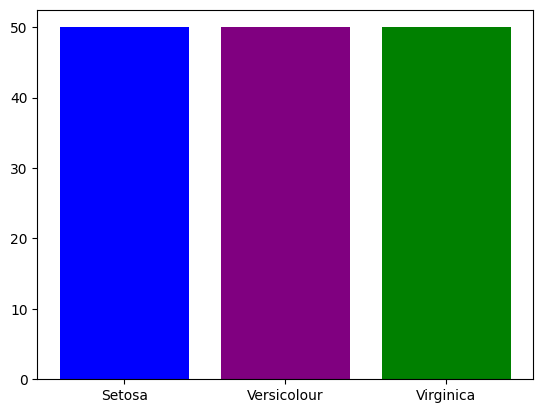

In [208]:
licznosc = iris.groupby('Nazwa kwiatka').size()
x = ['Setosa','Versicolour','Virginica']

plt.bar(x,licznosc,color=['blue','purple','green'])
plt.show()



## Wykres pudełkowy 

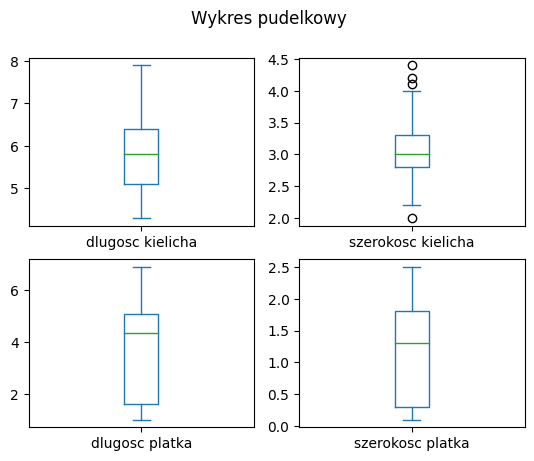

In [209]:
iris.drop('Nazwa kwiatka', axis=1).plot(kind='box', subplots=True, layout=(2, 2),
sharex=False, sharey=False, title="Wykres pudelkowy")

plt.show()

## Histogramy 

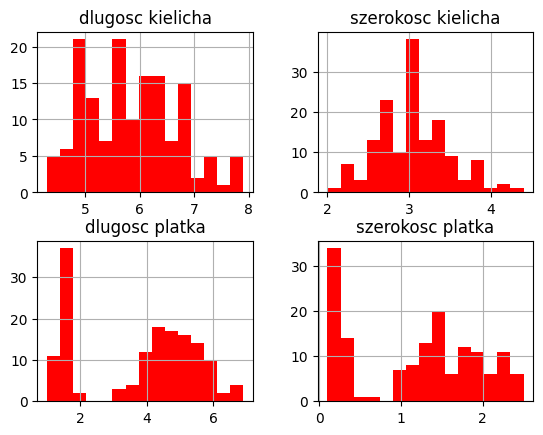

In [210]:
iris.drop('Nazwa kwiatka', axis=1).hist(bins=15, sharex=False, layout=(2, 2), color=['red'])
plt.show()

## Wykres Rozrzutu 

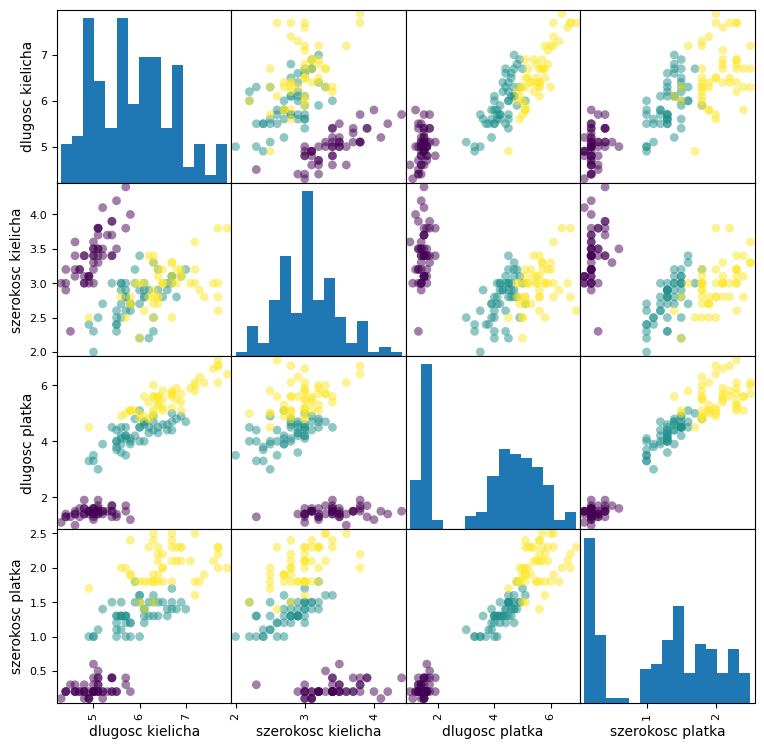

In [211]:
column_names = ['dlugosc kielicha','szerokosc kielicha','dlugosc platka','szerokosc platka']

X = iris[column_names]
# Tutaj zamieniam kategaryzacje slowna na liczbowa zeby przydzielic inne kolory na wykresie 
iris_temp = pd.factorize(iris['Nazwa kwiatka'])[0]

scatter = pd.plotting.scatter_matrix(X,marker='o',c=iris_temp,s=40,hist_kwds={'bins':15},figsize=(9,9))
plt.show()

## Regresja

### Regresja liniowa


Wiec rozdzielam moje dane(uwzględniając kategoryzacje na rodzaj kwiatu) na zbiór testowy i treningowy, następnie tworze model regresji liniowej i ucze go na podstawie zbioru treningowego i na tej podstawie tworzę predykcje co do przyszlych Y. Następnie porównuje rzeczywiste wartości z predykcjami. Robię tak dla każdego rodzaju kwiatu a nastepnie dla kazdej kolumny, mianowicie kazda kolumna zostaje zmienna objasniana a reszta zmiennych zostaje zmiennymi obajsniajacymi.


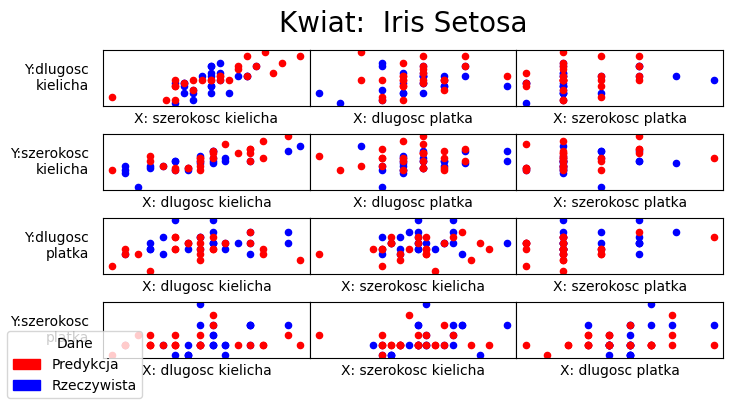

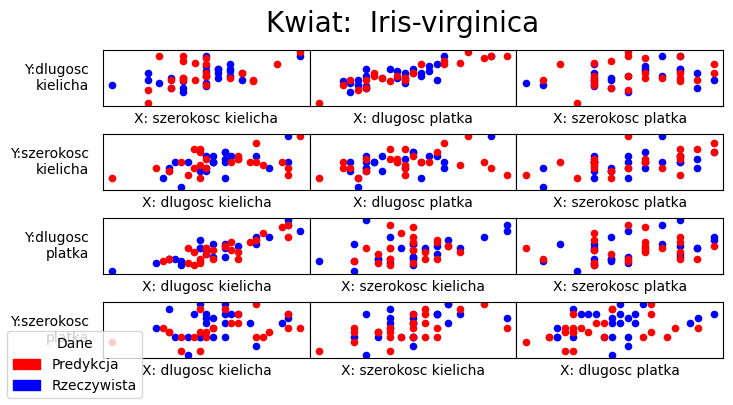

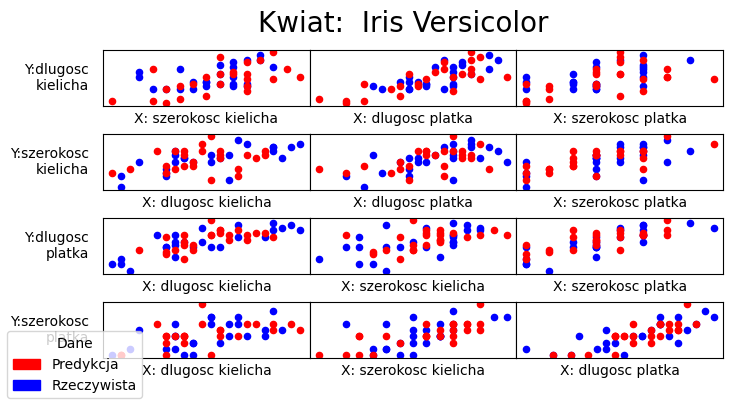

In [212]:
def rysowanie_wykresu_subplot(Xtrain,Ytrain,Xtest,Ytest,column_name,ax):
    # Funkcja dostaje wszystkie dane, które zebrala wczesniej w modelu regresji liniowej i na tej podstawie 
    # rysuje wykres
    # Ustawiam napisy po lewo 
    title = column_name.split()
    ax[0].set_ylabel("Y:"+title[0]+"\n"+title[1],rotation=0,labelpad=10,va ='center',ha='right')
    # Teraz dla kazdej zmiennej obajsniajacej(X) rysuje wykres scatter
    for index,((name_xtest,xtest),(name_xtrain,xtrain)) in enumerate(zip(Xtest.items(),Xtrain.items())):
        ax[index].set_xticks([])
        ax[index].set_yticks([])
        ax[index].scatter(xtest,Ytest,color="blue",s=20)
        ax[index].scatter(xtrain,Ytrain,color="red",s=20)
        ax[index].set_xlabel("X: "+name_xtest)
        # ax[index].legend(title="Dane",loc = "lower left",fontsize = 8)


def tworzenie_wykresu(dataset,nazwa_kwiatu):

    # Tworze wykres, który będzie przetrzymywał wykresy
    figg,(ax1,ax2,ax3,ax4) = plt.subplots(4,3,figsize=(8,4),gridspec_kw={'hspace': 0.5,'wspace':0})

    wykresy = [ax1,ax2,ax3,ax4]
    wykres = 0
    # Teraz iteruje po kazdej kolumnie 
    for column_name,column_data in dataset.items():
        # Podzial danych na zbior testowy i treningowy 
        Y = column_data
        # X beda wszystkie kolumny oprocz tej obecnie wybranej(Y)
        X = dataset.drop(column_name,axis=1)
        X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,Y,test_size=0.5)
        # Trenowanie modelu 
        model = sklearn.linear_model.LinearRegression()
        model.fit(X_train,Y_train) 
        y_pred = model.predict(X_train)
        rysowanie_wykresu_subplot(X_train,Y_train,X_test,Y_test,column_name,wykresy[wykres])
        wykres +=1 

    # Tworzenie legendy
    red_patch = mpatches.Patch(color='red', label='Predykcja')
    blue_patch = mpatches.Patch(color='blue', label='Rzeczywista')
    figg.suptitle("Kwiat:  "+str(nazwa_kwiatu),fontsize=20)
    figg.legend(handles=[red_patch,blue_patch],title="Dane",loc='lower left')
    plt.show()




# Tutaj bede przygotowywal dane i tworzyl wykresu dla danego kwiatu
# Grupowanie danych ze wzgledu na nazwe kwiatka 
iris_setosa = iris[iris['Nazwa kwiatka']=="Iris-setosa"].drop('Nazwa kwiatka',axis=1)
tworzenie_wykresu(iris_setosa,"Iris Setosa")
iris_vir = iris[iris['Nazwa kwiatka']=="Iris-virginica"].drop('Nazwa kwiatka',axis=1)
tworzenie_wykresu(iris_vir,"Iris-virginica")
iris_ver = iris[iris['Nazwa kwiatka']=="Iris-versicolor"].drop('Nazwa kwiatka',axis=1)
tworzenie_wykresu(iris_ver,"Iris Versicolor")



# Klasyfikacja


## Przygotowywanie danych 

In [213]:
column_names = ['dlugosc kielicha','szerokosc kielicha','dlugosc platka','szerokosc platka']
X = iris[column_names]

# Tutaj zamieniam kategaryzacje slowna na liczbowa zeby przydzielic inne kolory na wykresie 
iris_temp = pd.factorize(iris['Nazwa kwiatka'])[0]

Y = iris_temp
scaler = MinMaxScaler()
X = scaler.fit_transform(X)


## Multidimentional Scaling


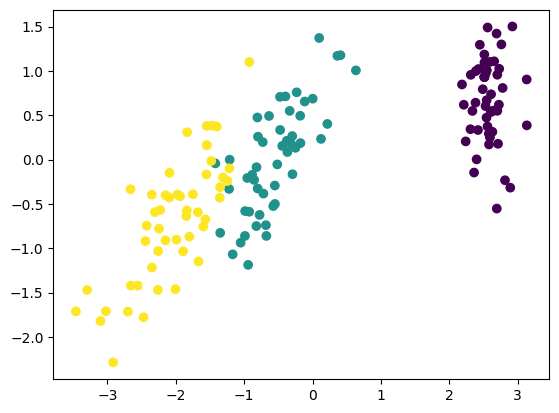

In [214]:
similaritites = pairwise_distances(iris.drop('Nazwa kwiatka',axis=1),metric = 'euclidean')

mds = MDS(n_components=2,max_iter = 100,eps=1e-9,random_state=123,dissimilarity="precomputed",normalized_stress='auto')
pos = mds.fit(similaritites).embedding_

plt.scatter(pos[:,0],pos[:,1],c = iris_temp)
plt.show()


## Regresja logiczna 

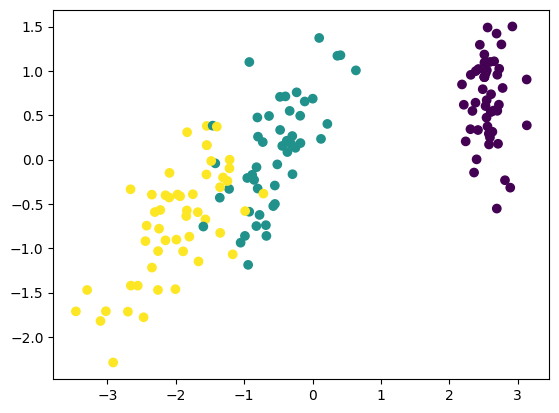

In [215]:
logreg = LogisticRegression()
logreg.fit(X,Y)

# Predykcja 
y_pred = logreg.predict(X)

plt.scatter(pos[:,0],pos[:,1],c=y_pred) 
plt.show()


## Drzewo klasyfikacyjne 

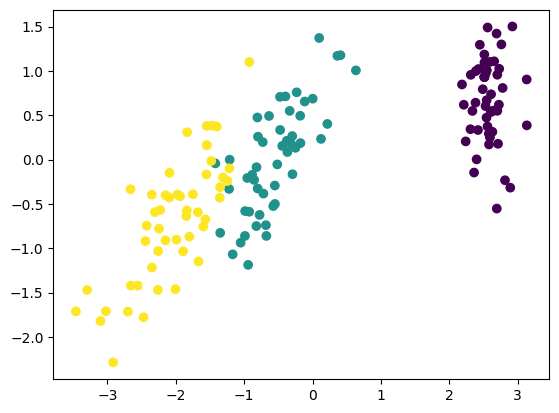

In [218]:
clf = DecisionTreeClassifier().fit(X,Y)
y_pred = clf.predict(X)
plt.scatter(pos[:,0],pos[:,1],c=y_pred)
plt.show()


## K-średnie 


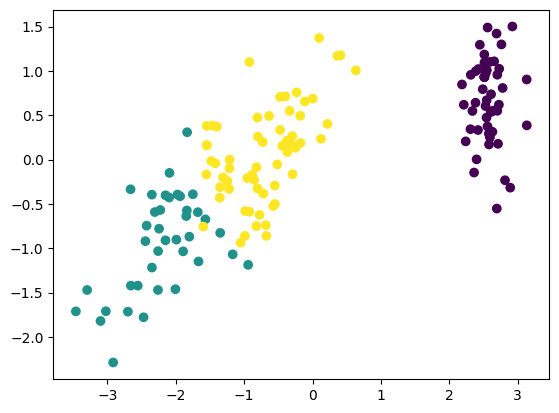

In [217]:
# k-means method
clusterer = KMeans(n_clusters=3, random_state=10,n_init='auto')
cluster_labels = clusterer.fit_predict(X)

plt.scatter(pos[:,0],pos[:,1], c=cluster_labels)
plt.show()
